In [7]:
import numpy as np
def k_means(points, k):
    maxiter = 100
    def initialize_centroids(points, k):
        centroids = points.copy()
        np.random.shuffle(centroids)
        return centroids[:k]
    def closest_centroid(points, centroids):
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    def move_centroids(points, closest, centroids):
        return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    centroids = initialize_centroids(points, k)
    for j in range(0, maxiter):
        CC = closest_centroid(points, centroids)
        centroids = move_centroids(points, CC, centroids)
    return CC

In [8]:
from sklearn import datasets
iris = datasets.load_iris()

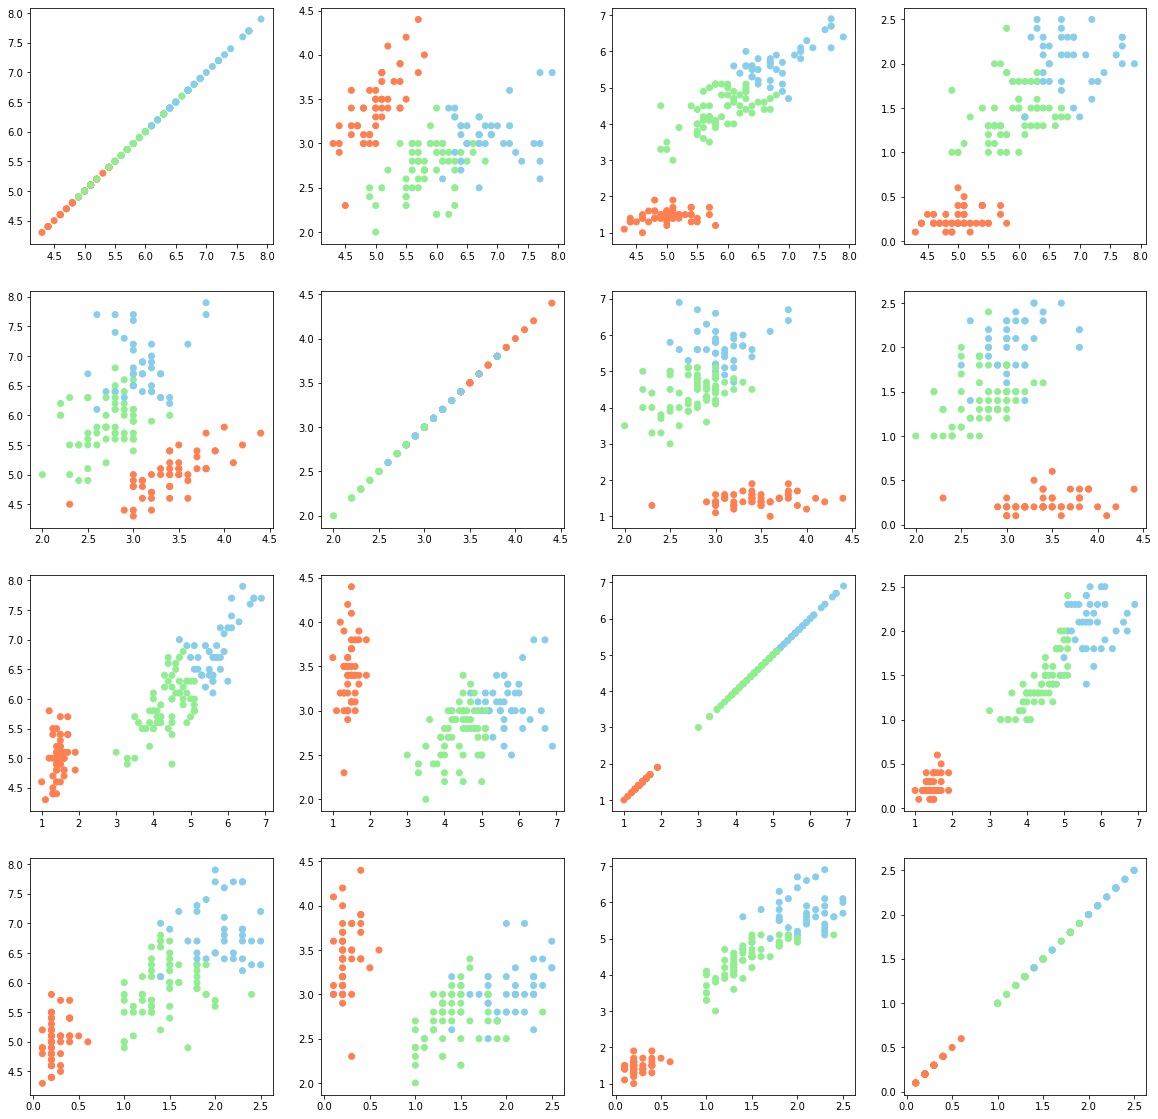

In [9]:
import matplotlib.pyplot as plt
classes = k_means(iris.data, 3)

group_colors = ['skyblue', 'coral', 'lightgreen', 'black', 'purple', 'red']
colors = [group_colors[j] for j in classes]

plot = plt.figure(figsize=(20, 20));
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.scatter(iris.data[:,i], iris.data[:,j], color=colors)